
Assignment

We have been asked to use our hypothesis testing skills to answer the following questions:

    Q1. Do smokers have higher insurance charges than non-smokers?
    Q2. Are men more likely to smoke than women?
    Q3. Do different regions have different charges, on average?

For each question:

    State your Null Hypothesis and Alternative Hypothesis
    Select the correct test according to the data type and number of samples
    Test the assumptions of your selected test.
    Execute the selected test, or the alternative test (if you do not meet the assumptions)
    Interpret your p-value and reject or fail to reject your null hypothesis
    Show a supporting visualization that helps display the result



## Import Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
scipy.__version__

'1.9.3'

## Import the Data

In [2]:
df = pd.read_csv('Data/US Health Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1. Do smokers have higher insurance charges than non-smokers?


## State the Hypothesis & Null Hypothesis

    Null Hypothesis: There is no difference between the insurance charges for smokers vs. non-smokers.

    Alternative Hypothesis: There is a difference between insurance charges for smokers vs. non-smokers.




## Determine the correct test to perform

    Numeric Data
    Two samples/groups
    We want to run a 2-sample T-test



## Visualize and separate data for hypothesis

    What column is our target? charges
    What column determines our group? smoker



In [4]:
## check the col that contains the meaasurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [5]:
## check the col that contains info on smoker
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [6]:
## create a column that easily separates our groups
df['yes_smoker'] = df['smoker'].str.contains('yes')
df['yes_smoker'].value_counts()

False    1064
True      274
Name: yes_smoker, dtype: int64

In [7]:
## save list of columns needed for each group
needed_cols = ['yes_smoker', 'charges']
df[needed_cols]

,yes_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [8]:
## save non_smokers in separate variable
non_smoker = df.loc[ df['yes_smoker']==False, needed_cols]
non_smoker

,yes_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [9]:
## save yes_smoker in separate variable
smokers = df.loc[ df['yes_smoker']==True, needed_cols]
smokers

,yes_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [10]:
## make a df just for visualization by concat the groups
plot_df = pd.concat([non_smoker,smokers])
plot_df

,yes_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


<Axes: xlabel='yes_smoker', ylabel='charges'>

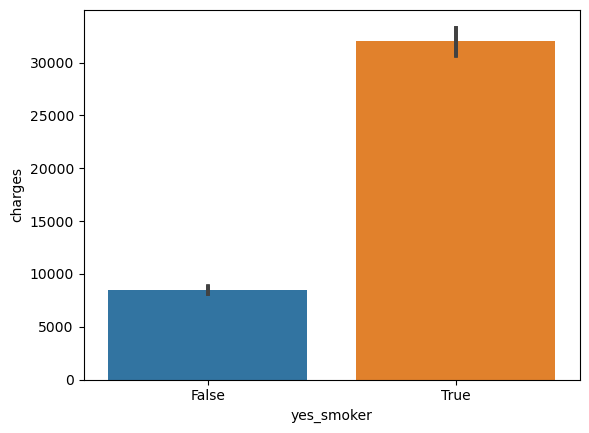

In [11]:
## visualize the group means
sns.barplot(data=plot_df, x='yes_smoker', y='charges')

## visualize the group means
sns.barplot(data=plot_df, x='yes_smoker', y='charges')

## Test Assumptions

    No significant outliers
    Normally
    Equal Variance



### Checking Assumption of No Significant Outliers

In [12]:
## Saving JUST the numberic col as final group variables
non_smoker_group = non_smoker['charges']
smokers_group = smokers['charges']
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [13]:
## Check smokers group for outliers
smokers_outliers = np.abs(stats.zscore(smokers_group)) >3
smokers_outliers.sum()

0

- no outliers in smokers group

In [14]:
## check non_smoker_group for outliers
non_smoker_outlier = np.abs(stats.zscore(non_smoker_group)) > 3
non_smoker_outlier.sum()

24

In [15]:
## remove outliers from non_smoker_group
non_smoker_group = non_smoker_group.loc[~non_smoker_outlier]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

# Test for Normality

In [16]:
## check smoker group for normality
result = stats.normaltest(smokers_group)
result.pvalue

5.564930630036463e-14

In [17]:
## check n for smoker group
len(smokers_group)

274

In [18]:
## check non_smoker_group for normality
result = stats.normaltest(non_smoker_group)
result.pvalue

2.6945416315543976e-36

In [19]:
## Check n for non_smoker_group
len(non_smoker_group)

1040

- We have large enough groups that we can safely disregard the assumption of normality

# Test Assumptions

    There are two categorical variables
    The oucomes are independent

In [20]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [21]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [22]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- The p-value is much less than 0.05, so we have a significant result.
- Since our p <.05, we reject the null hypothesis that men are not more likely to smoke than women.
- This means that we accept the alternative hypothesis and conclude that men are significantly more likely to smoke than women.


# Q3. Do different regions have different charges, on average?

## State the Hypothesis & Null Hypothesis

   - Null Hypothesis: There is no difference in charges between regions.
   - Alternative Hypothesis: There is a significant difference in charges between regions.



## Determine the correct test to perform.

- Numerical Data
- More than two groups/samples
- We want to run an ANOVA test

In [23]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

#### Visualize and separate data for hypothesis

- What column is our target? charges
- What column determines our groups? region

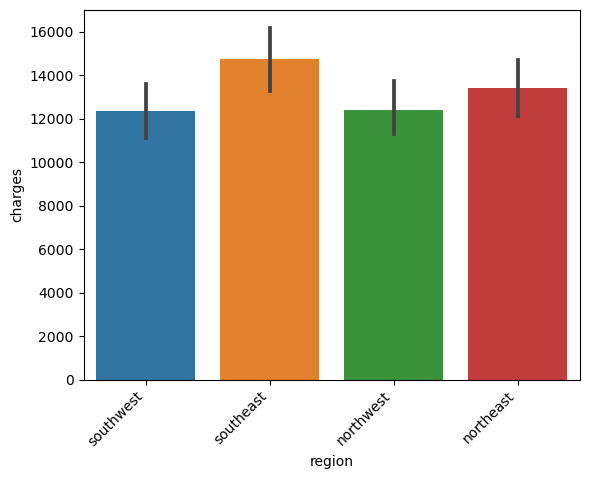

In [24]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [25]:
needed_cols = ['region','charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [26]:
## Create a dictionary with each group as key and charges as values
groups ={}

for sector in df['region'].unique():
    temp = df.loc[df['region']== sector, 'charges']
    groups[sector] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assumptions

- No significant outliers
- Normality
- Equal Variance



### Checking Assumption of No Sig. Outliers

In [27]:
## Loop through groups dict
for sector, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[sector] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


## Test for Normality

In [28]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


- We failed the assumption of normality, but our groups are large enough that we can safely disregard/ignore the assumption of normality.

# Test for Equal Variances

In [29]:
## DEMO: using the * operator to unpack lists
a_list = ['a','b','c']
b_list = [1,2,3]

new_list =[*a_list, *b_list]
new_list

['a', 'b', 'c', 1, 2, 3]

In [30]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [31]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance.
- We wanted to run an ANOVA test but will need to use a Kurshal-Wallis test instead.

# Final Hypothesis Test

In [32]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

### Interpret your p-value and reject or fail to reject your null hypothesis
- p-value > 0.05; will fail to reject null hypothesis
   - Accept that there is no difference in average charges between regions

## Show a supporting visualization that helps display the result

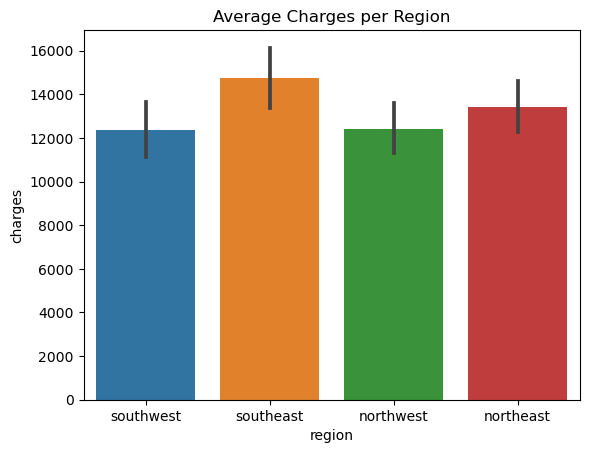

In [33]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_title('Average Charges per Region');